/usr/local/python/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:73: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


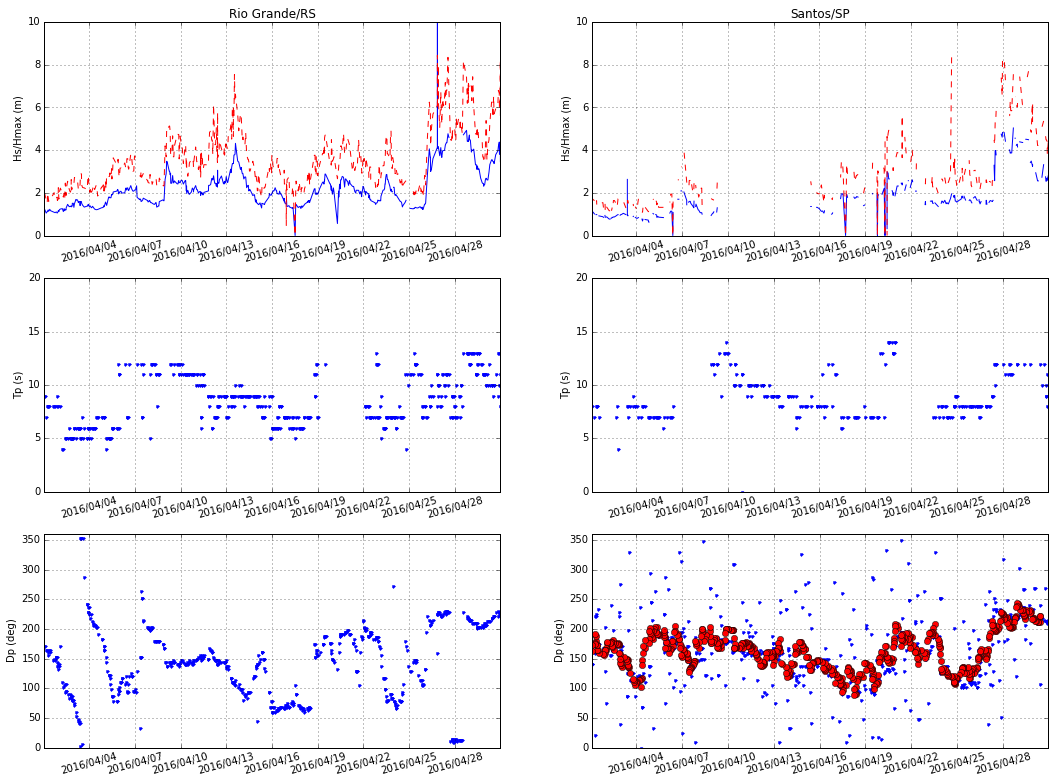

In [95]:
'''
PNBOIA wave data processing 
during April 2016
- Data do acidente da ciclovia
2012-04-21 at 11 h
'''
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

pathname = os.environ['HOME'] + '/Dropbox/database/pnboia/'

rig = pd.read_csv(pathname + 'RIG_201604.csv', parse_dates=['date'])
san = pd.read_csv(pathname + 'SAN_201604.csv', parse_dates=['date'])
rig1, san1 = np.array(rig), np.array(san)

rig1[np.where(rig1 == 'xxxx')] = np.nan
san1[np.where(san1 == 'xxxx')] = np.nan

rig = pd.DataFrame(rig1, columns=rig.columns, index=rig.date)
san = pd.DataFrame(san1, columns=san.columns, index=san.date)

fig = plt.figure(figsize=(18,13))

ax1 = fig.add_subplot(321)
ax1.plot(rig.index, rig.hs, 'b', rig.index, rig.hmax, '--r')
ax1.set_title('Rio Grande/RS')
ax1.set_ylim(0,10)
ax1.grid()
ax1.set_ylabel('Hs/Hmax (m)')
ax1.set_xticklabels(ax1.get_xticks(), rotation=15, visible=True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

ax2 = fig.add_subplot(322)
ax2.plot(san.index, san.hs, 'b', san.index, san.hmax, '--r')
ax2.set_ylim(0,10)
ax2.set_title('Santos/SP')
ax2.grid()
ax2.set_ylabel('Hs/Hmax (m)')
ax2.set_xticklabels(ax2.get_xticks(), rotation=15, visible=True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

ax3 = fig.add_subplot(323)
ax3.plot(rig.index, rig.tp, '.b')
ax3.set_ylim(0,20)
ax3.grid()
ax3.set_ylabel('Tp (s)')
ax3.set_xticklabels(ax3.get_xticks(), rotation=15, visible=True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

ax4 = fig.add_subplot(324)
ax4.plot(san.index, san.tp, '.b')
ax4.set_ylim(0,20)
ax4.grid()
ax4.set_ylabel('Tp (s)')
ax4.set_xticklabels(ax4.get_xticks(), rotation=15, visible=True)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

ax5 = fig.add_subplot(325)
ax5.plot(rig.index, rig.dp, '.b')
ax5.set_ylim(0,360)
ax5.grid()
ax5.set_ylabel('Dp (deg)')
ax5.set_xticklabels(ax5.get_xticks(), rotation=15, visible=True)
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

ax6 = fig.add_subplot(326)
ax6.plot(san.index, san.dp, '.b')
ax6.plot(san.index, pd.rolling_mean(san.dp,10), 'or')
ax6.set_ylim(0,360)
ax6.grid()
ax6.set_ylabel('Dp (deg)')
ax6.set_xticklabels(ax6.get_xticks(), rotation=15, visible=True)
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

fig.savefig('fig/PNBOIA_201604.png')
